Características del dataset: [np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean smoothness'), np.str_('mean compactness'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('mean symmetry'), np.str_('mean fractal dimension'), np.str_('radius error'), np.str_('texture error'), np.str_('perimeter error'), np.str_('area error'), np.str_('smoothness error'), np.str_('compactness error'), np.str_('concavity error'), np.str_('concave points error'), np.str_('symmetry error'), np.str_('fractal dimension error'), np.str_('worst radius'), np.str_('worst texture'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst smoothness'), np.str_('worst compactness'), np.str_('worst concavity'), np.str_('worst concave points'), np.str_('worst symmetry'), np.str_('worst fractal dimension')]
Etiquetas de las clases: ['malignant' 'benign']
Forma de las características (X): (569, 30)

El número de muestras de entrena

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411 (5.51 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)


Iniciando entrenamiento...
Entrenamiento del modelo finalizado.

Evaluando el modelo en el conjunto de prueba...
Pérdida (Loss) en prueba: 0.2415
Precisión (Accuracy) en prueba: 95.61%


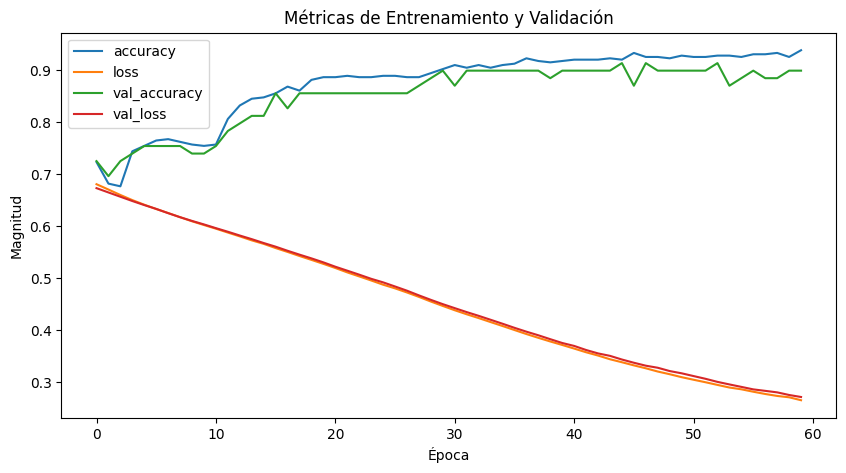

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import logging

# Configuración de logs de TensorFlow
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# 1. CARGA DE DATOS
# ==============================================================================
data = load_breast_cancer()
X = data.data
y = data.target

print(f"Características del dataset: {list(data.feature_names)}")
print(f"Etiquetas de las clases: {data.target_names}")
print(f"Forma de las características (X): {X.shape}")

# Crear un DataFrame para inspección
data_df = pd.DataFrame(X, columns=data.feature_names)

# 2. DIVISIÓN Y ESCALAMIENTO DE DATOS
# ==============================================================================
# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)
print('\nEl número de muestras de entrenamiento: {}'.format(X_train.shape[0]))
print('El número de muestras de prueba: {}'.format(X_test.shape[0]))

# Escalado de características (normalización entre 0 y 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. CREACIÓN Y COMPILACIÓN DEL MODELO
# ==============================================================================
input_shape = X_train_scaled.shape[1:]

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=30, input_shape=input_shape, activation='relu'),
    tf.keras.layers.Dense(units=15, activation='relu'),
    # Capa de salida para clasificación binaria
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo - CORRECCIÓN APLICADA
model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy']) # Se utiliza una LISTA ['accuracy']

model_1.summary()

# 4. ENTRENAMIENTO DEL MODELO
# ==============================================================================
print("\nIniciando entrenamiento...")
history = model_1.fit(
    X_train_scaled,
    y_train,
    epochs=60,
    validation_split=0.15,
    verbose=0 # Se pone 0 para no saturar la salida
)
print("Entrenamiento del modelo finalizado.")

# 5. EVALUACIÓN Y VISUALIZACIÓN
# ==============================================================================

# Evaluación en el conjunto de prueba
print("\nEvaluando el modelo en el conjunto de prueba...")
loss, acc = model_1.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Pérdida (Loss) en prueba: {loss:.4f}")
print(f"Precisión (Accuracy) en prueba: {acc*100:.2f}%")

# Gráfico de pérdida y precisión
loss_acc_metrics_df = pd.DataFrame(history.history)
loss_acc_metrics_df.plot(figsize=(10,5))
plt.title("Métricas de Entrenamiento y Validación")
plt.xlabel("Época")
plt.ylabel("Magnitud")
plt.show()